In [22]:
import pandas as pd
import requests
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import numpy as np

def getLottoWinInfo(startRound, endRound):
    drwtNo1 = []
    drwtNo2 = []
    drwtNo3 = []
    drwtNo4 = []
    drwtNo5 = []
    drwtNo6 = []
    bnusNo = []
    totSellamnt = []
    drwNoDate = []
    firstAccumamnt = []
    firstPrzwnerCo = []
    firstWinamnt = []
    roundNo = []
    
    for i in tqdm(range(startRound, endRound+1, 1)):
        # i = 1
        req_url = "https://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo=" + str(i)
        
        req_lotto = requests.get(req_url)
        
        lottoNo = req_lotto.json()
        
        drwtNo1.append(lottoNo['drwtNo1'])
        drwtNo2.append(lottoNo['drwtNo2'])
        drwtNo3.append(lottoNo['drwtNo3'])
        drwtNo4.append(lottoNo['drwtNo4'])
        drwtNo5.append(lottoNo['drwtNo5'])
        drwtNo6.append(lottoNo['drwtNo6'])
        bnusNo.append(lottoNo['bnusNo'])
        roundNo.append(i)
        
        totSellamnt.append(lottoNo['totSellamnt'])
        drwNoDate.append(lottoNo['drwNoDate'])
        firstAccumamnt.append(lottoNo['firstAccumamnt'])
        firstPrzwnerCo.append(lottoNo['firstPrzwnerCo'])
        firstWinamnt.append(lottoNo['firstWinamnt'])
        
        lotto_dict = {"추첨일":drwNoDate, "회차":roundNo, "Num1":drwtNo1, 
                      "Num2":drwtNo2, "Num3":drwtNo3, "Num4":drwtNo4, 
                      "Num5":drwtNo5, "Num6":drwtNo6, "bnsNum":bnusNo, 
                      "총판매금액":totSellamnt, "총1등당첨금":firstAccumamnt, 
                      "1등당첨인원":firstPrzwnerCo, "1등수령액":firstWinamnt}

        #lotto_df = pd.DataFrame(lotto_dict)
        
        # pandas로 변환
        db = pd.DataFrame(lotto_dict)
        
        # csv 파일로 저장
        db.to_csv("lotto_win_info.csv", header=True, encoding='utf-8-sig')
   
    #return  lotto_df

In [23]:
db= getLottoWinInfo(1, 700)

100%|██████████| 700/700 [01:51<00:00,  6.29it/s]


In [24]:
df=pd.read_csv("lotto_win_info.csv")
df.shape

(700, 14)

Unnamed때문에 첫번째 코드 위에 label 지정해줬는데 동일한 결과 나옴. 나중에 삭제하기

In [25]:
df.head(30)

,Unnamed: 0,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0
5,5,2003-01-11,6,14,15,26,27,40,42,34,15305356000,0,1,6574451700
6,6,2003-01-18,7,2,9,16,25,26,40,42,12794890000,2600913000,0,0
7,7,2003-01-25,8,8,19,25,34,37,39,9,20751450000,7336896000,0,0
8,8,2003-02-01,9,2,4,16,17,36,39,14,73624020000,25803852000,0,0
9,9,2003-02-08,10,9,25,30,33,41,44,6,260856392000,0,13,6430437900


### 4. 로또 빅데이터 분석
아래 명령어로 개수, 평균, 표준편차, 최대 최소 등의 간략한 통계정보를 얻을 수 있다.

In [26]:
pd.options.display.float_format = '{:,.12}'.format  # 깔끔하게 나오게 하기 위해
df.describe()

,Unnamed: 0,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
count,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0,700.0
mean,349.5,350.5,6.63,12.9742857143,19.8528571429,26.1814285714,32.7428571429,39.4442857143,22.2157142857,"53,949,703,602.9","7,695,475,849.07",6.21,"2,856,552,741.96"
std,202.216880271,202.216880271,5.32104763422,6.83020485378,7.40431033706,7.66370769901,6.89920422996,5.25035963655,13.4120580312,"13,987,849,911.9","6,655,970,271.9",3.34564179601,"2,948,773,460.27"
min,0.0,1.0,1.0,2.0,3.0,5.0,9.0,19.0,1.0,"3,681,782,000.0",0.0,0.0,0.0
25%,174.75,175.75,2.75,8.0,14.0,21.0,28.0,37.0,10.0,"45,930,677,750.0",0.0,4.0,"1,495,752,417.75"
50%,349.5,350.5,5.0,12.0,20.0,27.0,34.0,41.0,22.0,"52,983,961,500.0","10,624,555,200.0",6.0,"1,989,719,906.5"
75%,524.25,525.25,9.25,17.0,25.0,32.0,38.0,44.0,34.0,"59,435,033,500.0","13,510,962,093.8",8.0,"3,250,136,315.75"
max,699.0,700.0,35.0,37.0,39.0,43.0,44.0,45.0,45.0,2.60856392e+11,"43,624,374,375.0",30.0,"40,722,959,400.0"


### 5. 당첨 번호 분석
이 데이터들 중 관심 있는 로또 번호!!! 들만 모아서 통계정보를 보자

In [28]:
# 1~6번 번호만 가져오자
df_only_number=pd.DataFrame([df['Num1'], df['Num2'], df['Num3'], 
                             df['Num4'], df['Num5'], df['Num6']]).T

pd.options.display.float_format = '{:,.5}'.format  # 깔끔하게 나오게 하기 위해

for i in range(1, 7):
    print('%d 번 번호 평균 : %d' % (i, int(df_only_number.mean()[i-1])))
    
df_only_number.describe()

1 번 번호 평균 : 6
2 번 번호 평균 : 12
3 번 번호 평균 : 19
4 번 번호 평균 : 26
5 번 번호 평균 : 32
6 번 번호 평균 : 39


,Num1,Num2,Num3,Num4,Num5,Num6
count,700.0,700.0,700.0,700.0,700.0,700.0
mean,6.63,12.974,19.853,26.181,32.743,39.444
std,5.321,6.8302,7.4043,7.6637,6.8992,5.2504
min,1.0,2.0,3.0,5.0,9.0,19.0
25%,2.75,8.0,14.0,21.0,28.0,37.0
50%,5.0,12.0,20.0,27.0,34.0,41.0
75%,9.25,17.0,25.0,32.0,38.0,44.0
max,35.0,37.0,39.0,43.0,44.0,45.0


### 6. 각 당첨번호 분포 분석
아래 코드를 이용하여 각 당첨번호들의 histogram을 그려보자.  
아래 그림은 1~6번 당첨번호의 숫자 빈도수 그래프이다. 신기한 건 그래프들이 가우시안이나 normal 분포가 아니었다. 어떤 분포인지 찾아보려다가 말았다.

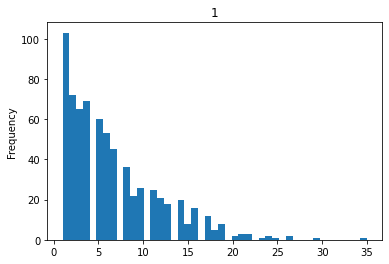

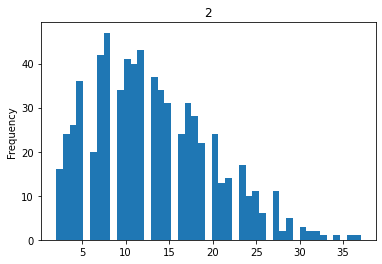

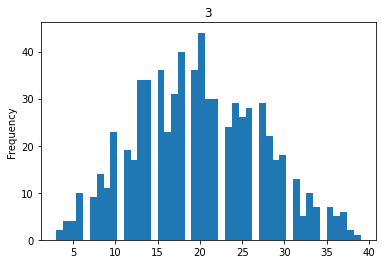

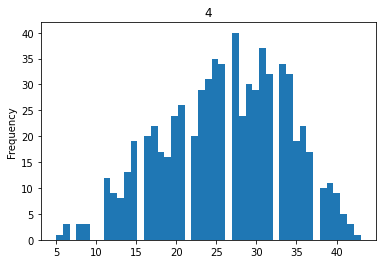

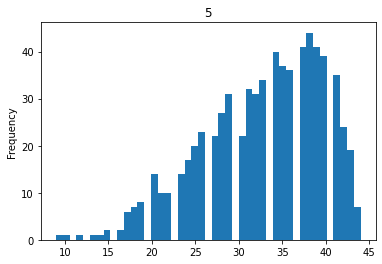

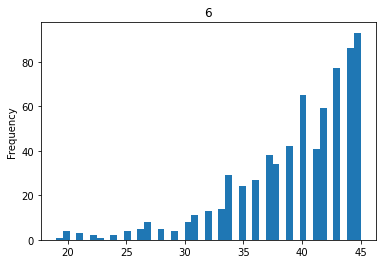

In [29]:
df_only_number['Num1'].plot.hist(bins=45)
plt.title('1')
plt.show()

df_only_number['Num2'].plot.hist(bins=45)
plt.title('2')
plt.show()

df_only_number['Num3'].plot.hist(bins=45)
plt.title('3')
plt.show()

df_only_number['Num4'].plot.hist(bins=45)
plt.title('4')
plt.show()

df_only_number['Num5'].plot.hist(bins=45)
plt.title('5')
plt.show()

df_only_number['Num6'].plot.hist(bins=45)
plt.title('6')
plt.show()

### 7. 1등 당첨 숫자
아래 코드로 그 회에 1등이 몇 번 당첨됐는지를 확인해봤다.

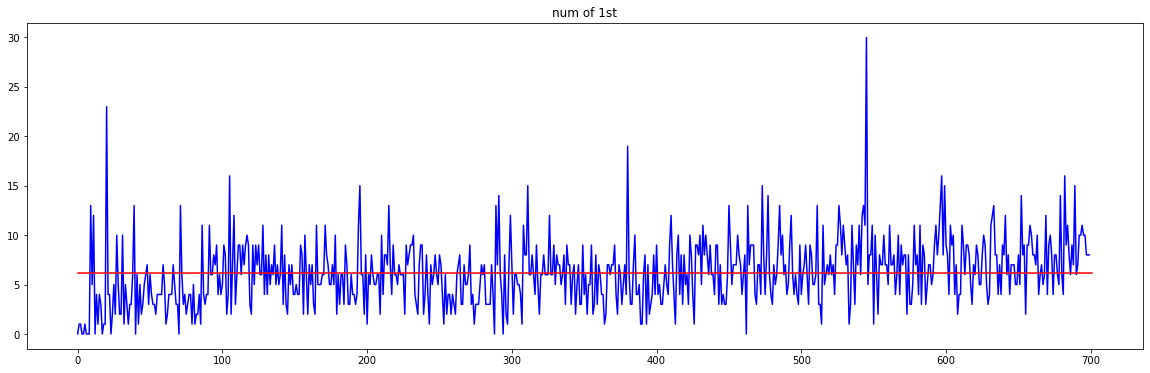

In [31]:
df['1등당첨인원'].plot(figsize=(20,6),color = 'blue')
plt.plot(list(range((len(df['1등당첨인원'])+2))), [df['1등당첨인원'].mean()]*(len(df['1등당첨인원'])+2), 'red')
plt.title('num of 1st')
plt.show()

### 8. 총판매금액 추이

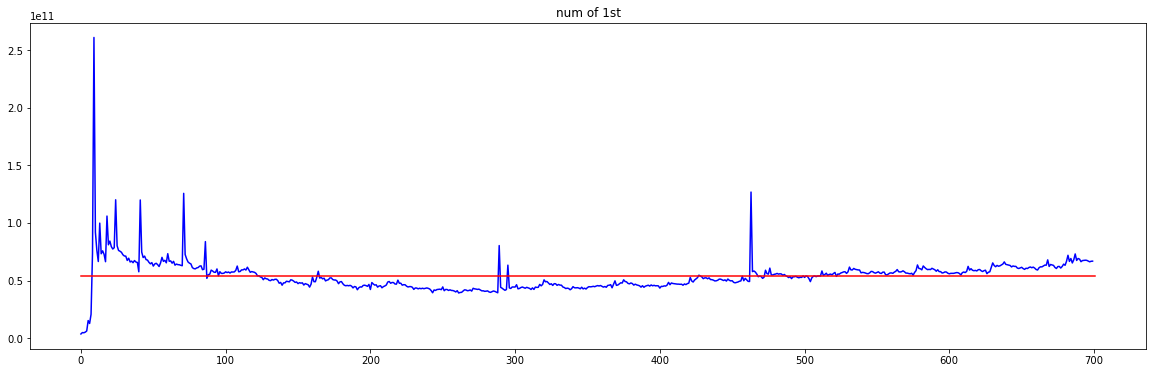

In [32]:
df['총판매금액'].plot(figsize=(20,6),color = 'b')
plt.plot(list(range((len(df['총판매금액'])+2))), [df['총판매금액'].mean()]*(len(df['총판매금액'])+2), 'red')
plt.title('num of 1st')
plt.show()

### 9. 숫자별 평균 개수

평균 갯수 : 93


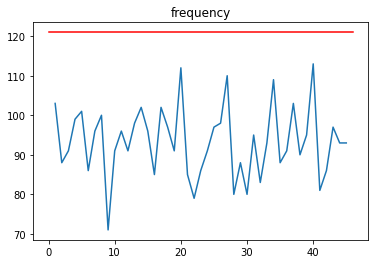

In [34]:
numm_tmp = pd.concat([df_only_number['Num1'], df_only_number['Num2'], df_only_number['Num3'], 
                      df_only_number['Num4'], df_only_number['Num5'], df_only_number['Num6']])
numm_tmp1 = numm_tmp.value_counts().sort_index()

print('평균 갯수 : %.0f' % (numm_tmp1.mean()))

plt.plot(numm_tmp1)
plt.plot(list(range((len(numm_tmp1)+2))), [121]*(len(numm_tmp1)+2), 'red')
plt.title('frequency')
plt.show()

1~45 숫자 달은 모두 평균 121번씩 나왔다. 근데 그중 유독 안 나온 숫자들이 있다!!!

[9, 22, 23, 29, 32, 41] 이 6개의 숫자들은 다른 숫자들에 비해 너무 안 나왔다. 만약 큰 수의 법칙(Law of Large Number)을 믿는다면 위 번호들로 도전해 보자. 로또를 엄청 많은 회차로 진행한다면(무한대 or 100,000 이상) 샘플 평균이 모집단의 평균이 된다. 즉 계속할수록 작은 녀석들이 많이 나올 수도?? 

In [35]:
print('많이 나온 숫자들 : %s\n\n%s' % (list(numm_tmp1.sort_values()[39:].keys().sort_values()), 
                                numm_tmp1.sort_values()[:6]))

많이 나온 숫자들 : [1, 20, 27, 34, 37, 40]

9     71
22    79
28    80
30    80
41    81
32    83
dtype: int64


### Discussion
지금까지 로또 당첨 빅데이터를 통계적으로 분석했다. 로또는 매번 완전 랜덤이다. 그러므로 지금까지 분석한 과거의 데이터로 미래를 예측할 수 없다. 종속이 아니라 완전 독립이므로 이번 주 로또를 알 수 있는 건 불가능하다!!!!